# COVID binary classification
In this *notebook* we design a ConvNet to binary classification COVID-19 images.The model distinguishes between covid patient radiographs and others (pneumonia patients and healthy people). The deep model is an inception net, with five inception blocks. Each block has four convolutional layers with filters of 1x1,1x1, 3x3 and 5x5, also the block has MaxPooling layers before the convolutional layers. 

The dataset contains very little images of COVID patients, specifically 87 in the train set and only 10 to test, for this reason, we use the SMOTE Algorithm to generate new samples of COVID images.

In [1]:
__author__ = '@iRodGit'
import numpy as np
import pandas as pd
import os
from PIL import Image
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Add
from keras.layers import AveragePooling2D, Conv2D, MaxPooling2D, concatenate # Concatenate
from keras.models import Sequential, Model
from keras.utils import to_categorical
from codvidutils.imageproc import map_categorical

Using TensorFlow backend.


## Load and pre-processing data

In [2]:
train_class = pd.read_csv('data/train_split_v2.txt', sep=' ', header=None, names=['patientID', 'image_path', 'class'])
test_class = pd.read_csv('data/test_split_v2.txt', sep=' ', header=None, names=['patientID', 'image_path', 'class'])

In [5]:
pics = []
for img in train_class['image_path'].values:
    pics.append(np.array(Image.open('data/train/' + img))[:, :,:3])
#test_pics = []
for img in test_class['image_path'].values:
    pics.append(np.array(Image.open('data/test/' + img))[:, :, :3])

print("Number of images:", len(pics))

Number of images: 18527


In [6]:
values_dict = {'COVID-19': 1,'pneumonia': 2,'normal': 0}
test_class['class_categorical'] = test_class['class'].apply(map_categorical, args=(values_dict,))
train_class['class_categorical'] = train_class['class'].apply(map_categorical, args=(values_dict,))

In [7]:
X = np.array(pics)
del pics
diseaseID_train = np.asarray(train_class["class_categorical"])
diseaseID_test = np.asarray(test_class["class_categorical"])
diseaseID = np.concatenate([diseaseID_train, diseaseID_test],axis=0)
print('shape X: {},  disease_ID (Y): {}'.format(X.shape, diseaseID.shape ))

shape X: (18527, 200, 200, 3),  disease_ID (Y): (18527,)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10)
X_covid = X_test[diseaseID_test==1]
X_nocovid = X_test[diseaseID_test==0][:10]
X_prove = np.concatenate([X_covid,X_nocovid],axis=0)
Y_prove = np.concatenate([np.ones(10),np.zeros(10)])
print(Y_prove.shape)
X_prove.shape

In [ ]:
X_prove = X_prove/255


In [ ]:
A = datagen.flow(X_prove,Y_prove, batch_size=5)

In [ ]:
len(A[3][0])

In [ ]:
from matplotlib import pyplot
for X_batch in datagen.flow(X_covid Y, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))#,6
        pyplot.imshow(X_batch[i].reshape([200,200,3]))#, cmap=pyplot.get_cmap('gray'))
        # show the plot
    pyplot.show()
    break

In [ ]:
A = datagen.flow(X_covid, batch_size=8)
print(len(A[0]))

In [ ]:
print(A[1].shape)

In [ ]:
s = ndimage.rotate(X_test[diseaseID_test==0],-6,reshape= False, axes=[1,2])
s.shape

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))#,
plt.imshow(s[500])

In [ ]:
from scipy import ndimage
a = X_test[diseaseID_test==0][5]
print(a.shape)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))#,
rotate_face = ndimage.rotate(a, -0,reshape=False)
plt.imshow(rotate_face)


plt.plot([15,195],[15,15],color="blue")
plt.plot([15,195],[195,195],color="blue")
plt.plot([195,195],[15,195],color="blue")
plt.plot([15,15],[15,195],color="blue")

plt.plot([10,190],[10,10],color="red")
plt.plot([10,190],[190,190],color="red")
plt.plot([190,190],[10,190],color="red")
plt.plot([10,10],[10,190],color="red")

plt.plot([20,180],[20,20],color="orange")
plt.plot([20,180],[180,180],color="orange")
plt.plot([180,180],[20,180],color="orange")
plt.plot([20,20],[20,180],color="orange")


In [ ]:
def rotate_arrays(pictures):
    news = []
    for pic in pictures:
        aleat = np.random.randint(low=-12, high=12)
        print(aleat)
        rot =ndimage.rotate(pic, -aleat,reshape=False)
        news.append(rot[10:190,10:190])
        
    news= np.array(news)    
    return news
    

In [ ]:
d = rotate_arrays(X_test[diseaseID_test==1])

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))#,
plt.imshow(d[5])
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))#,
plt.imshow(X_test[diseaseID_test==1][5])

In [ ]:
X_train_news = new_pictures_arrays(X_train[diseaseID_train==1])
X_train_news.shape

In [ ]:
"""
News images to train 
"""
X_train_news = new_pictures_arrays(X_train[diseaseID_train==1])
print(X_train_news.shape)
diseaseID_train_news = np.ones(X_train_news.shape[0])
print(diseaseID_train_news.shape)
X_train = X_train[:,10:190,10:190]
X_train = np.concatenate([X_train,X_train_news],axis=0)
diseaseID_train = np.concatenate([diseaseID_train,diseaseID_train_news],axis=0)
del X_train_news, diseaseID_train_news
print(X_train.shape)
print(diseaseID_train.shape)

In [ ]:
"""
News images to test 
"""
X_test_news = new_pictures_arrays(X_test[diseaseID_test==1])
print(X_test_news.shape)
diseaseID_test_news = np.ones(X_test_news.shape[0])
print(diseaseID_test_news.shape)
X_test = X_test[:,10:190,10:190]
X_test = np.concatenate([X_test,X_test_news],axis=0)
diseaseID_test = np.concatenate([diseaseID_test,diseaseID_test_news],axis=0)
del X_test_news, diseaseID_test_news
print(X_test.shape)
print(diseaseID_test.shape)

In [ ]:
40//

In [ ]:
from scipy import ndimage
a = X_test[0]
print(a.shape)
a=a.reshape(180,180)
lx,ly =a.shape
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))#,
rotate_face = ndimage.rotate(a, 8)
plt.imshow(rotate_face)

## Imbalanced methods
We reduce the NO-COVID images and create new COVID images with the SMOTE Algorithm

In [8]:
from collections import Counter
counter = Counter (diseaseID)
print(counter)
dicto = {2: 4500, 0: 4500, 1:97}
print(dicto)

from imblearn.under_sampling import RandomUnderSampler
#X = X.reshape(X,X.shape[0],-1)
X = X.reshape(X.shape[0],-1)
print(X.shape)
under = RandomUnderSampler(sampling_strategy =dicto)
X, diseaseID = under.fit_resample(X, diseaseID)
# summarize class distribution
print(diseaseID.shape)
print(X.shape)

Counter({2: 9579, 0: 8851, 1: 97})
{0: 4500, 1: 97, 2: 4500}
(18527, 120000)
(9097,)
(9097, 120000)


In [9]:
n = np.random.randint(1000,6760)
print(n)
from sklearn.utils import shuffle
X, diseaseID = shuffle(X, diseaseID, random_state=n)
from sklearn.model_selection import train_test_split
m = np.random.randint(1000,6760)
print(m)
X_train, X_test, diseaseID_train, diseaseID_test = train_test_split(X, diseaseID, test_size=0.20, random_state=m)
del X, diseaseID

2715
2678


In [10]:
X_train = X_train.reshape(X_train.shape[0],200,200,3)
X_test = X_test.reshape(X_test.shape[0],200,200,3)

In [11]:
print("Normal train: ",diseaseID_train[diseaseID_train==0].shape)
print("Pneumonia train: ",diseaseID_train[diseaseID_train==2].shape)
print("COVID train: ",diseaseID_train[diseaseID_train==1].shape)
print("*******************************************************")
print("Normal test: ",diseaseID_test[diseaseID_test==0].shape)
print("Pneumonia test: ",diseaseID_test[diseaseID_test==2].shape)
print("COVID test: ",diseaseID_test[diseaseID_test==1].shape)

Normal train:  (3590,)
Pneumonia train:  (3617,)
COVID train:  (70,)
*******************************************************
Normal test:  (910,)
Pneumonia test:  (883,)
COVID test:  (27,)


In [13]:
from codvidutils import nwpic as nw
"""
News images to train 
"""
X_train_news = nw.new_pictures_arrays(X_train[diseaseID_train==1])
print(X_train_news.shape)
diseaseID_train_news = np.ones(X_train_news.shape[0])
print(diseaseID_train_news.shape)
X_train = X_train[:,10:190,10:190]
X_train = np.concatenate([X_train,X_train_news],axis=0)
diseaseID_train = np.concatenate([diseaseID_train,diseaseID_train_news],axis=0)
del X_train_news, diseaseID_train_news
print(X_train.shape)
print(diseaseID_train.shape)

(1750, 180, 180, 3)
(1750,)
(9027, 180, 180, 3)
(9027,)


In [14]:
"""
News images to test 
"""
X_test_news = nw.new_pictures_arrays(X_test[diseaseID_test==1])
print(X_test_news.shape)
diseaseID_test_news = np.ones(X_test_news.shape[0])
print(diseaseID_test_news.shape)
X_test = X_test[:,10:190,10:190]
X_test = np.concatenate([X_test,X_test_news],axis=0)
diseaseID_test = np.concatenate([diseaseID_test,diseaseID_test_news],axis=0)
del X_test_news, diseaseID_test_news
print(X_test.shape)
print(diseaseID_test.shape)

(675, 180, 180, 3)
(675,)
(2495, 180, 180, 3)
(2495,)


In [15]:
Y_train = np.copy(diseaseID_train)
del diseaseID_train
Y_train[Y_train==2]=0
Y_test = np.copy(diseaseID_test)
Y_test[Y_test==2]=0

X_test = X_test/255
X_train = X_train/255

## Deep model

In [16]:
def inception_block (previous_layer,filters =[64,128,32,32]):
    conv1x1 = Conv2D(filters=filters[0], kernel_size=(1,1), activation='relu')(previous_layer)
    conv1x1_2 = Conv2D(filters=filters[1], kernel_size=(1,1), activation='relu')(previous_layer)
    conv1x1_3 = Conv2D(filters=filters[2], kernel_size=(1,1), activation='relu')(previous_layer)
    conv3x3 = Conv2D(filters=filters[1], kernel_size=(3,3), activation='relu',padding="same")(conv1x1_2)
    conv5x5 = Conv2D(filters=filters[2], kernel_size=(5,5), activation='relu',padding="same")(conv1x1_3)
    max_pool= MaxPooling2D(pool_size=(3,3),padding="same",strides=1)(previous_layer)
    conv_max = Conv2D(filters=filters[3], kernel_size=(1,1), activation='relu',padding="same")(max_pool)
    inception = concatenate([conv1x1, conv3x3,conv5x5,conv_max])
    return inception

In [28]:
"""
Incep_5 archiquecture using Functional api
"""
input_layer = Input(shape= (180,180,3,))
inception_1 = inception_block(input_layer,filters =[16,32,8,8])
pool_1 = MaxPooling2D()(inception_1)
inception_2 = inception_block(pool_1)
pool_2 = MaxPooling2D()(inception_2)
inception_3 = inception_block(pool_2)
pool_3= MaxPooling2D()(inception_3)
inception_4 = inception_block(pool_3)
pool_4= MaxPooling2D()(inception_4)
inception_5 = inception_block(pool_4)
pool_5 = MaxPooling2D(pool_size= (2,2))(inception_5)
inception_6 = inception_block(pool_5)
pool_6= MaxPooling2D(pool_size= (5,5))(inception_6)
conv_FC = Conv2D(filters =128,kernel_size =(1,1),activation="relu")(pool_6)
first_dense = Conv2D(filters =32,kernel_size =(1,1),activation="relu")(conv_FC)
#sec_dense = Conv2D(filters =16,kernel_size =(1,1),activation="relu")(first_dense)
flat = Flatten()(first_dense)
out_layer= Dense(units =1, activation= "sigmoid")(flat)
deep = Model(inputs=input_layer, outputs=out_layer)


deep.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 180, 180, 3)  0                                            
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 180, 180, 32) 128         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 180, 180, 8)  32          input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 180, 180, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_39 

In [29]:
print('Train shape X: {},  Y: {} \n Test shape X: {}, Y: {}'.format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

Train shape X: (9027, 180, 180, 3),  Y: (9027,) 
 Test shape X: (2495, 180, 180, 3), Y: (2495,)


In [19]:
"""
Weighted loss
"""
covid_count, no_covid_count = Y_train[Y_train==1].shape[0],Y_train[Y_train==0].shape[0]
total_count = covid_count + no_covid_count
print(covid_count, no_covid_count)
weight_no_covid = covid_count / total_count
weight_covid = no_covid_count / total_count
dic_weights = {0: weight_no_covid, 1: weight_covid}
print(dic_weights)

1820 7207
{0: 0.20161737011188657, 1: 0.7983826298881135}


In [30]:
from keras.callbacks import ModelCheckpoint
ASG = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=True)
filepath="Inception_bestmodel_trained.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

deep.compile(optimizer=ASG, loss='binary_crossentropy', metrics=['acc',"mse"])
history = deep.fit(X_train, Y_train, epochs=12, batch_size=32, callbacks= [checkpoint],verbose=2, class_weight=dic_weights,validation_data=(X_test, Y_test))


Train on 9027 samples, validate on 2495 samples
Epoch 1/12
 - 51s - loss: 0.1696 - acc: 0.7077 - mean_squared_error: 0.1798 - val_loss: 0.4557 - val_acc: 0.7659 - val_mean_squared_error: 0.1514

Epoch 00001: val_acc improved from -inf to 0.76593, saving model to Inception_bestmodel_trained.hdf5
Epoch 2/12
 - 45s - loss: 0.1044 - acc: 0.8489 - mean_squared_error: 0.1054 - val_loss: 0.2570 - val_acc: 0.9082 - val_mean_squared_error: 0.0728

Epoch 00002: val_acc improved from 0.76593 to 0.90822, saving model to Inception_bestmodel_trained.hdf5
Epoch 3/12
 - 45s - loss: 0.0614 - acc: 0.9159 - mean_squared_error: 0.0617 - val_loss: 0.2531 - val_acc: 0.9110 - val_mean_squared_error: 0.0682

Epoch 00003: val_acc improved from 0.90822 to 0.91102, saving model to Inception_bestmodel_trained.hdf5
Epoch 4/12
 - 45s - loss: 0.0362 - acc: 0.9519 - mean_squared_error: 0.0357 - val_loss: 0.2749 - val_acc: 0.9066 - val_mean_squared_error: 0.0688

Epoch 00004: val_acc did not improve
Epoch 5/12
 - 45s 

In [31]:
pred = deep.predict(X_test)
pred.shape

(2495, 1)

In [32]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresold = roc_curve(Y_test,pred)
roc_auc = auc(fpr,tpr)
print(roc_auc)

0.9604992825851721


In [35]:
from keras.models import load_model
model = load_model("Inception_bestmodel_trained.hdf5")
pred_best = model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
cm = confusion_matrix(Y_test[:1820], pred[:1820].round())
cm_norm = normalize(cm, norm = 'l1')
print(cm, "\n", cm_norm)

print("Best model")
cm= confusion_matrix(Y_test[:1820], pred_best[:1820].round())
cm_norm = normalize(cm, norm = 'l1')
print(cm, "\n",cm_norm)

[[1770   23]
 [   6   21]] 
 [[0.98717234 0.01282766]
 [0.22222222 0.77777778]]
Best model
[[1713   80]
 [   5   22]] 
 [[0.95538204 0.04461796]
 [0.18518519 0.81481481]]


In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred.round())
cm_norm = normalize(cm, norm = 'l1')
print(cm, "\n", cm_norm)
print("Best model")
cm= confusion_matrix(Y_test, pred_best.round())
cm_norm = normalize(cm, norm = 'l1')
print(cm, "\n", cm_norm)

[[1770   23]
 [ 201  501]] 
 [[0.98717234 0.01282766]
 [0.28632479 0.71367521]]
Best model
[[1713   80]
 [ 116  586]] 
 [[0.95538204 0.04461796]
 [0.16524217 0.83475783]]


In [48]:
Y_test[Y_test==0].shape

(1793,)

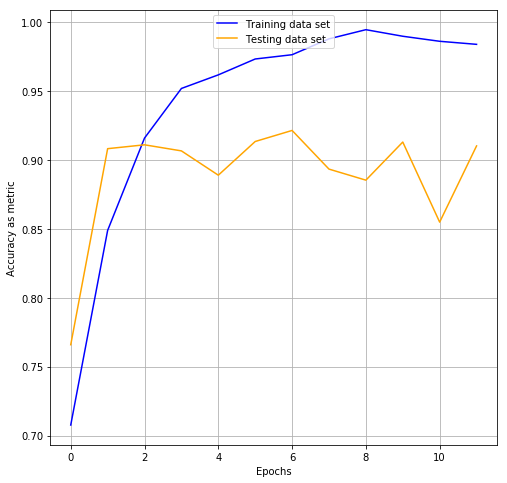

In [49]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))#,6

plt.grid(True)
plt.plot(history.history["acc"], color="blue", label="Training data set")
plt.plot(history.history["val_acc"], color="orange", label="Testing data set")
plt.ylabel('Accuracy as metric')
plt.xlabel('Epochs')
plt.legend(loc='upper center')
plt.show()

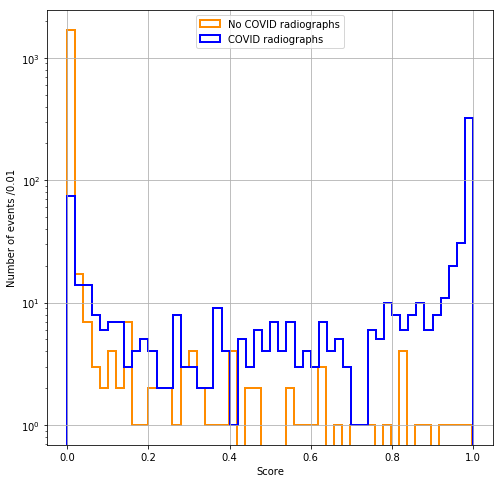

In [50]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))#,6
plt.style.use('seaborn-deep') 
plt.grid(True)

lw=2
plt.hist(pred[(Y_test==0)],50,histtype='step',lw=lw,color='darkorange', label= "No COVID radiographs")
plt.hist(pred[(Y_test==1)],50,histtype='step',lw=lw,color='blue', label= "COVID radiographs")
plt.ylabel('Number of events /0.01')
plt.xlabel('Score')
plt.yscale("log")
plt.legend( loc='upper center')
plt.show()

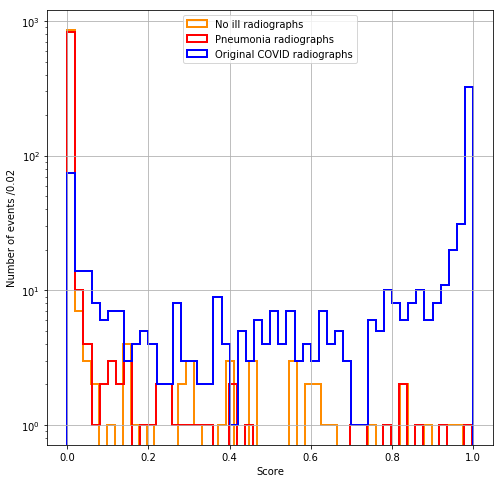

In [51]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))#,6
plt.style.use('seaborn-deep') 
plt.grid(True)

lw=2
plt.hist(pred[(diseaseID_test==0)],50,histtype='step',lw=lw,color='darkorange', label= "No ill radiographs")
plt.hist(pred[(diseaseID_test==2)],50,histtype='step',lw=lw,color='red', label= "Pneumonia radiographs")
plt.hist(pred[(diseaseID_test==1)],50,histtype='step',lw=lw,color='blue', label= "Original COVID radiographs")
#plt.hist(pred[1953:],50,histtype='step',lw=lw,color='green', label= "Created COVID radiographs")

plt.ylabel('Number of events /0.02')
plt.xlabel('Score')
plt.yscale("log")
plt.legend( loc='upper center')
plt.show()

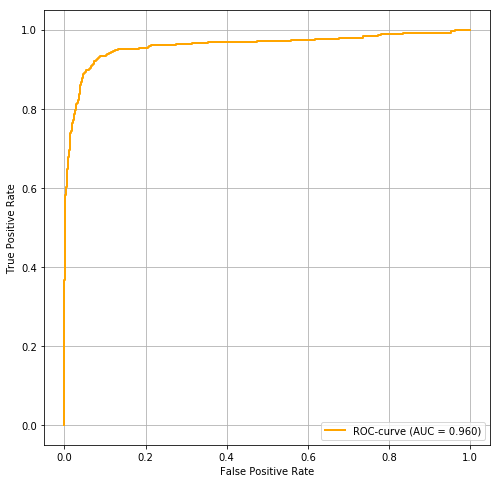

In [52]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))#,6
plt.style.use('seaborn-deep') 
#plt.title("Simulation", weight="bold", x=0.50)
plt.grid(True)
#yticks(np.arange(0.97, 1, step=0.005))
lw = 2
plt.plot(fpr, tpr, color='orange',lw=2, label='ROC-curve (AUC = %0.3f)' % (roc_auc))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#plt.title("Simulation Preliminary", color = '#e159e1',loc="left", weight="bold", size="large")
plt.legend(loc="lower right")
plt.show()